# Geneate a Test Test Set

In [17]:
# imports
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from fronts import io as fronts_io
from fronts.dbof import io as dbof_io
from fronts.train import tables as ttables

# Load up DBOF

In [7]:
dbof_dev_json_file = 'llc4320_dbof_dev.json'
config_file = 'DBOF_train_config_jake_test.json'

In [8]:
config = fronts_io.loadjson(config_file)

## Main table

In [3]:
dbof_table = dbof_io.load_main_table(dbof_dev_json_file)
dbof_table.head()

Read main table: /home/xavier/Oceanography/data/OGCM/DBOF/DBOF_dev/DBOF_dev.parquet


,lat,lon,row,col,datetime,UID,SSTK,SSSs,Divb2,SSS,SSH,U,Fs,V
0,56.752953,-170.447922,11465,10890,2011-09-30,13173401467539552,False,False,False,False,False,False,True,False
1,56.796970,-155.677078,11469,11599,2011-09-30,131734014679724323,False,False,False,False,False,False,True,False
2,56.818966,-155.635422,11471,11601,2011-09-30,131734014681924365,False,False,False,False,False,False,True,False
3,56.631676,-152.864578,11454,11734,2011-09-30,131734014663227135,False,False,False,False,False,False,True,False
4,56.917801,-152.114578,11480,11770,2011-09-30,131734014691827885,False,False,False,False,False,False,True,False


## Meta table

In [11]:
meta_tbl = dbof_io.load_meta_table(dbof_dev_json_file, config['sampling']['field'])

Read main table: /home/xavier/Oceanography/data/OGCM/DBOF/DBOF_dev/Fields/DBOF_dev_Divb2_meta.parquet


# Generate test, train tables

In [9]:
train_tbl, valid_tbl, test_tbl =  ttables.dbof_gen_tvt(dbof_dev_json_file, config_file)

Read main table: /home/xavier/Oceanography/data/OGCM/DBOF/DBOF_dev/DBOF_dev.parquet
Read main table: /home/xavier/Oceanography/data/OGCM/DBOF/DBOF_dev/Fields/DBOF_dev_Divb2_meta.parquet


In [5]:
## Check log Divb2 distribution

In [15]:
in_train = meta_tbl.UID.isin(train_tbl.UID)
#in_train

<Axes: xlabel='p90', ylabel='Count'>

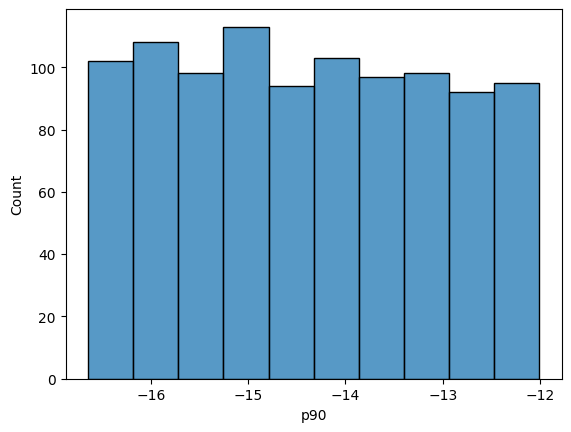

In [18]:
sns.histplot(np.log10(meta_tbl[in_train].p90), bins=10)